In [13]:
# -*- coding: utf-8 -*-
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('updated_csv_filtered_FINAL copy.csv')
print(df.dtypes)
df = df[df.Country == 'US']

# df.to_csv("final_loc.csv", index=False)

URL                    object
All_Keywords           object
Title                  object
Reason_For_Fund        object
Total_Raised          float64
Total_Goal            float64
Percent_Reached       float64
Campaign_Date          object
Organizer              object
Beneficiary            object
Location               object
Donors                float64
Shares                float64
Followers             float64
Num_Updates           float64
Num_Comments          float64
Is_Charity               bool
Charity                object
Currency_Code          object
Donation_Count        float64
Comments_Enabled         bool
Donations_Enabled        bool
Country                object
Is_Business              bool
Is_Team                  bool
Campaign_Photo_URL     object
Description            object
dtype: object


In [24]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_loc.csv')
df['Location'] = df['Location'].fillna('')

df['State'] = df['Location'].str.split(',').str[1]
df['City'] = df['Location'].str.split(',').str[0]
print(df)

df.to_csv("final_bs4data.csv", index=False)

                                                    URL        All_Keywords  \
0     https://www.gofundme.com/f/winter-relief-for-o...          ['heroin']   
1                   https://www.gofundme.com/f/rugwtpqc          ['opiate']   
2     https://www.gofundme.com/f/pwj7t-help-max-walk...  ['rehabilitation']   
3               https://www.gofundme.com/f/StefGoldberg           ['rehab']   
4                  https://www.gofundme.com/f/seashaven      ['dependency']   
...                                                 ...                 ...   
7916    https://www.gofundme.com/f/sin-fin-land-project      ['dependency']   
7917  https://www.gofundme.com/f/help-our-guards039-...      ['dependency']   
7918             https://www.gofundme.com/f/helpclenard      ['dependency']   
7919  https://www.gofundme.com/f/please-help-selene-...           ['demon']   
7920  https://www.gofundme.com/f/in-loving-memory-of...           ['demon']   

                                          Title    

In [25]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('updated_csv_filtered_FINAL copy.csv')
print(df.dtypes)
df = df[df.Country == 'US']
df['Location'] = df['Location'].fillna('')

df['State'] = df['Location'].str.split(',').str[1]
df['City'] = df['Location'].str.split(',').str[0]
print(df)

df.to_csv("bs4-statecity.csv", index=False)

# df.to_csv("final_loc.csv", index=False)

URL                    object
All_Keywords           object
Title                  object
Reason_For_Fund        object
Total_Raised          float64
Total_Goal            float64
Percent_Reached       float64
Campaign_Date          object
Organizer              object
Beneficiary            object
Location               object
Donors                float64
Shares                float64
Followers             float64
Num_Updates           float64
Num_Comments          float64
Is_Charity               bool
Charity                object
Currency_Code          object
Donation_Count        float64
Comments_Enabled         bool
Donations_Enabled        bool
Country                object
Is_Business              bool
Is_Team                  bool
Campaign_Photo_URL     object
Description            object
dtype: object
                                                    URL  \
0         https://www.gofundme.com/f/let-them-stay-home   
1     https://www.gofundme.com/f/mark-richards-medic...   

In [8]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from nltk.corpus import stopwords
stopwrds = stopwords.words('english')
from nltk.tokenize import word_tokenize, sent_tokenize

analyzer = SentimentIntensityAnalyzer()
df = pd.read_csv('bs4-statecity.csv')
# df = df.iloc[:5]

df['Description'] = df['Description'].fillna("")
df['Title'] = df['Title'].fillna("")
# train['SummarySent'] = train['Summary'].apply(analyzer.polarity_scores)
df['Compound_Description'] = [analyzer.polarity_scores(txt)['compound'] for txt in df['Description']]
df['Neg_Description'] = [analyzer.polarity_scores(txt)['neg'] for txt in df['Description']]
df['Neu_Description'] = [analyzer.polarity_scores(txt)['neu'] for txt in df['Description']]
df['Pos_Description'] = [analyzer.polarity_scores(txt)['pos'] for txt in df['Description']]

df['Compound_Title'] = [analyzer.polarity_scores(txt)['compound'] for txt in df['Title']]
df['Neg_Title'] = [analyzer.polarity_scores(txt)['neg'] for txt in df['Title']]
df['Neu_Title'] = [analyzer.polarity_scores(txt)['neu'] for txt in df['Title']]
df['Pos_Title'] = [analyzer.polarity_scores(txt)['pos'] for txt in df['Title']]
print(df.head())


print(df.dtypes)

# df.to_csv("GFM_sentiment.csv", index=False)

                                                 URL  \
0      https://www.gofundme.com/f/let-them-stay-home   
1  https://www.gofundme.com/f/mark-richards-medic...   
2             https://www.gofundme.com/f/jaynasdream   
3  https://www.gofundme.com/f/hope-and-help-for-judy   
4          https://www.gofundme.com/f/Bunners-battle   

                                        All_Keywords  \
0                                         ['opiate']   
1                                         ['opiate']   
2       ['opiate', 'overdose', 'drugs', 'addiction']   
3                            ['opiate', 'addiction']   
4  ['addict', 'addiction', 'opiate', 'drugs', 're...   

                        Title             Reason_For_Fund  Total_Raised  \
0          Let them stay home     Accidents & Emergencies        4223.0   
1  Mark Richards Medical Fund  Medical, Illness & Healing        2545.0   
2               Jayna’s Dream                       Other        5350.0   
3      Hope and Help for J

In [9]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from nltk.corpus import stopwords
stopwrds = stopwords.words('english')
from nltk.tokenize import word_tokenize, sent_tokenize

df = pd.read_csv('GFM_sentiment.csv')

df['Description'] = df['Description'].fillna("")
df['Title'] = df['Title'].fillna("")
 
df['Description_Length'] = df['Description'].str.split().str.len()
df['Title_Length'] = df['Title'].str.split().str.len()

df.to_csv("GFM_sentiment_length.csv", index=False)

In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from nltk.corpus import stopwords
stopwrds = stopwords.words('english')
from nltk.tokenize import word_tokenize, sent_tokenize

df = pd.read_csv('GFM_sentiment_length.csv')

print(df["Description_Length"].mean())
print(df["Title_Length"].mean())

454.99065774523416
4.855447544501957


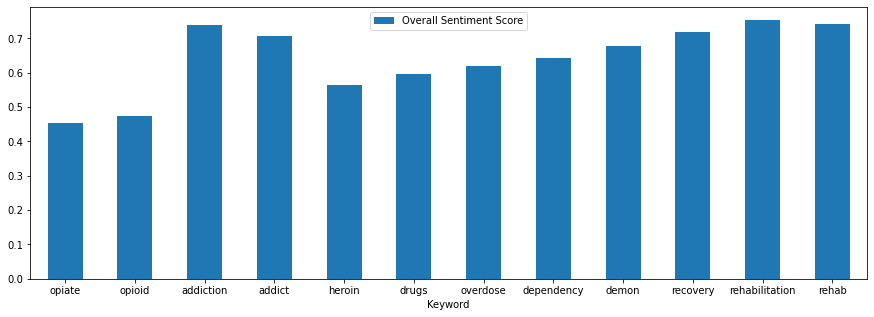

In [16]:
#Question 2 - Working with the Algorithms 
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

df = pd.read_csv('GFM_sentiment_length.csv') 

opiate = df[df['All_Keywords'].str.contains("opiate")]
opioid = df[df['All_Keywords'].str.contains("opioid")]
addiction = df[df['All_Keywords'].str.contains("addiction")]
addict = df[df['All_Keywords'].str.contains("addict")]
heroin = df[df['All_Keywords'].str.contains("heroin")]
drugs = df[df['All_Keywords'].str.contains("drugs")]
overdose = df[df['All_Keywords'].str.contains("overdose")]
dependency = df[df['All_Keywords'].str.contains("dependency")]
demon = df[df['All_Keywords'].str.contains("demon")]
recovery = df[df['All_Keywords'].str.contains("recovery")]
rehabilitation = df[df['All_Keywords'].str.contains("rehabilitation")]
rehab = df[df['All_Keywords'].str.contains("rehab")]

opiate_sent = opiate["Compound_Description"].mean()
opioid_sent = opioid["Compound_Description"].mean()
addiction_sent = addiction["Compound_Description"].mean()
addict_sent = addict["Compound_Description"].mean()
heroin_sent = heroin["Compound_Description"].mean()
drugs_sent = drugs["Compound_Description"].mean()
overdose_sent = overdose["Compound_Description"].mean()
dependency_sent = dependency["Compound_Description"].mean()
demon_sent = demon["Compound_Description"].mean()
recovery_sent = recovery["Compound_Description"].mean()
rehabilitation_sent = rehabilitation["Compound_Description"].mean()
rehab_sent = rehab["Compound_Description"].mean()

df = pd.DataFrame({'Keyword':['opiate', 'opioid', 'addiction', 'addict', 'heroin', 'drugs', 'overdose', 'dependency', 'demon', 'recovery', 'rehabilitation', 'rehab'], 
                   'Overall Sentiment Score':[opiate_sent, opioid_sent, addiction_sent, addict_sent, heroin_sent, drugs_sent, overdose_sent, dependency_sent, demon_sent, recovery_sent, rehabilitation_sent, rehab_sent]})
ax = df.plot.bar(x='Keyword', y='Overall Sentiment Score', rot=0, figsize=(15,5))
fig = ax.get_figure()
fig.savefig('sentscore_per_keyword.png')